# Pairs Trading Algorithm Project

## <b>Overview</b>

- Pairs trading is a statistical arbitrage form of trading based on mean reversion and mathematical analysis.
- It is a strategy where we look to find a highly correlated and stationary pair of securities (ie: 0.9 correlation).
- The goal is to be long Security A, and short Security B such that you maximize the return on both assets reverting to their means, while eliminating your exposure to Delta Risk.
     - The aim of pairs trading is to bet that, if the prices of 2 assets diverge, they will converge eventually.

- Here is a diagram of the basic concept of pairs trading, notice that the return on the trade is the spread capitalization - transaction cost .

![PairsTradingDiagram.png](PairsTradingDiagram.png)


1.<b>Method:</b>
1. We aim to create a model which tests for correlation between the basket of securities for stationary pairs.
2. We then test for cointegration, which is a test between two time series to whether they will deviate approximating a relative mean.
    - To do so, we can use the <b>Engle–Granger</b> two-step method to test for cointegration.
    - We can also use the <b>Johansen</b> test to check for cointegration between the two time series.
3. We also need to test for stationarity of the time series, whether the time series have variances or means which changes over time.
    - Examples of these could be stochastic processes such as random walk time series, or trend/cycle time series.
    - We can test for stationarity using the <b>Augmented Dickey-Fuller Test</b>.


2.<b>Imports</b>

In [5]:
from statistics import mean
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
from hurst import compute_Hc
import math
import seaborn as sn
from matplotlib.pyplot import figure
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
import numpy as np

Tool Utilization:
- Pandas (Data Manipulation)
- yFinance(Pulling Data Points)
- Stats Models
- Hurst
- Date Time
- Seaborn (Heat Maps)
- Numpy
- Matplotlib

<b>Trading Method:</b>
- Find 2 assets from S&P500 that move similarly with eachother (whether it be a negative or positive correlation or cointegration)
- Trade the spread tightening (mean-reversion) between the two correlated securities by being long Security A and Short Security B

<b>Cointegration Sample:</b>

Lets try to generate some fake securities to test for some cointegration
- We can set the seed for the python plot 
- We then generate a random security (Security A) while drawing samples from a normal distribution, the time series will be shifted up to mimic a traded security

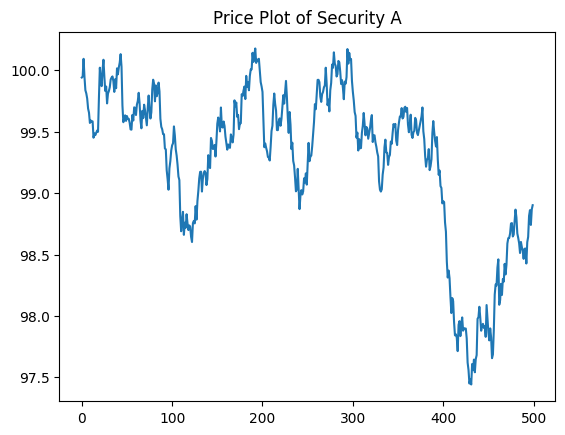

In [22]:
np.random.seed(591)
samples_a = np.random.normal(0, 0.1, 500) # Generate return for 500 samples (Mu = 0, Sigma = 0.1, Scale = 500)
#Shift to price range and plot
SecA = 100 + pd.Series(np.cumsum(samples_a), name='Security A')
SecA.plot(title= "Price Plot of Security A");


Next, we generate a security B to visualize against Security A. 

Since our goal is to demonstrate securities which are cointegrated, we can generate a security B which has a significant fundemental correlation to security A, while adding additional randomness/noise to the data. We can do so by adding additional data from a normal distribution to the data of Security A. 

Security B will also be priced at a different level than Security A, for the sake of capturing the resemblance to how correlated securities can be priced in the market.

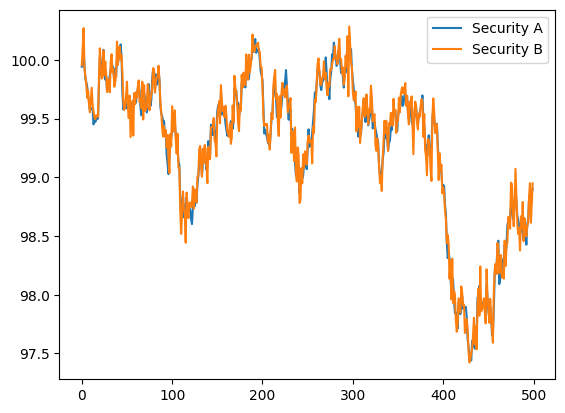

In [25]:
SecB = np.random.normal(0, 0.1, 500) + SecA
SecB.name = 'Security B'
pd.concat([SecA, SecB], axis=1).plot();